#Lab 01. TensorFlow 기초

TensorFlow 불러오기 및 버전 확인

In [0]:
import tensorflow as tf

tf.__version__

'1.14.0'

TensorFlow 기본 출력

In [0]:
hello = tf.constant("Hello, TensorFlow!")

sess = tf.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


Session이라는 것을 만들고, sess.run을 통해서 이 노드를 출력한다.
b라는 것은 bytes string이라는 것이다. 신경쓰지 말 것.

In [0]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [0]:
print("node1:", node1, "node2:", node2)
print("node3: ", node3)

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


단순 출력을 할 경우, node가 어떤 텐서라는 것을 알려준다.

In [0]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


이렇게 sess.run을 통해 실행시켜주어야 한다.

TensorFlow 순서를 보면, graph를 build하고, sess.run을 통해 graph를 실행시키고, 그 결과가 나오는 것이다.

In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict ={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2,4]}))

7.5
[3. 7.]


미리 graph를 만들고, 그 값을 나중에 주고 싶다면?
> placeholder라는 노드를 만들어서 나중에 feed_dict를 통해 값을 넘겨준다.



#Lab 02. Linear Regression

In [0]:
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x_train * W + b

#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

먼저, cost가 무엇인지를 그 값을 설명한다.

GradientDescent를 활용하여 minimize를 수행한다.

여기서는 w와 b는 variables이고, 이를 사용하기 위해서는 global_variables_initializer()가 실행되어야 한다.

근데, train만 실행시켜도 그래프를 따라서 w와 b값에 역시 변화가 생긴다. 이때 학습이 일어나고, 그 과정에서 20번에 한번씩 그 결과를 보는 것.

In [0]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
  W_val, b_val, _ = sess.run([W, b, train],
              feed_dict={X: [1., 2., 3., 4., 5.], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
  if step % 20 == 0:
    print(step, W_val, b_val)
  if step % 2000 == 0:
    cost_val = sess.run([cost], feed_dict={X:[1., 2., 3., 4., 5.], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    print(cost_val)

Placeholder를 이용하여 값의 변화를 용이하게 할 수 있다.

즉, 먼저 그래프 모델을 만든 후에 그 값을 넘겨줄 수 있다.

In [0]:
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5,3.5]}))

[6.100773]
[3.5993826]
[2.5988266 4.5999384]


학습한 모델이 잘 하는가? Hypothesis에 X값을 줘서 맞는 값이 나오는지 확인할 수 있다.

여기서 보면 X값에 +1.1이 되어야 하므로 꽤 잘 나오는 것을 볼 수 있다.

#Lab 03. Cost 최소화 TensorFlow로 구현해보기

기존에는 optimize.minimize()를 사용하였지만, 이제 이걸 TensorFlow로 구현해보자.

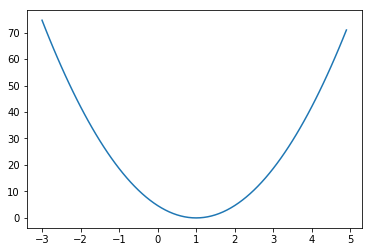

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

#Simple Model (exclude + b)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
  feed_W = i * 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict={W:feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)
  
plt.plot(W_val, cost_val)
plt.show()

w_val과 cost_val을 이용하여 w와 cost의 값을 저장할 리스트를 만든다.

-3에서 5까지 0.1정도 간격으로 움직일 것이다.

여기서 계속 w를 변화시키면서 그걸 토대로 다시 변화시키고, plt.plot()함수를 이용하여 x축이 w, y축이 cost 인 그래프를 그린다.

In [0]:
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

cost 함수를 미분 = 기울기를 구한다. 이때, 기울기가 음수이면 w는 줄어들어야하고, 기울기가 양수이면 w는 증가해야한다.

gradient는 기울기로, 수식을 그대로 써주고 mean()함수를 통해 평균 낸다.

TensorFlow는 바로 대입하는 것이 아니라 W.assign과 같은 식으로 assign() 함수를 이용하여 대입할 수 있다. 이를 update로 가져오는 것이고, 여기서 이 update를 실행시키는 것.

In [0]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(21):
  sess.run(update, feed_dict={X: x_data, Y: y_data})
  print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

실행할수록 cost는 작아지고, w는 1에 가까운 수가 된다. (그래프와 일치))

In [0]:
import tensorflow as tf
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(21):
  print(step, sess.run(W))
  sess.run(train)

위의 코드에서 W의 값을 5로 바꿔도, -3으로 바꿔도 결국 W는 1로 수렴한다. (실행시)

#Lab 04-1. 다변수 linear regression 구현

여기서는 x1, x2, x3 세개의 변수를 사용한다. x가 많을수록 더 정밀한 값이 나온다.

In [0]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x1:x1_data, x2:x2_data, x3:x3_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

결국 다변수이기 때문에 hypothesis 식이 변한 것 외에는 별다른 차이가 없음.

위의 단점은, 변수의 수에 따라서 코드가 너무 더러워 진다는 것이다. 여기서 Matrix를 이용한다. 아래에서 구현해보자.

In [0]:
x_data = [[73., 80., 75.], [93., 88., 93.],
          [89., 91., 90.], [96., 86., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x1:x1_data, x2:x2_data, x3:x3_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

눈여겨 보아야 할 것: shape[]. 여기서, x의 변수 개수가 3개 이므로 None, **3**으로 설정해준다.

여기서 None의 의미는 3개씩 세트로 몇개가 들어올지 모른다는 것을 의미한다.

tf.matmul 함수를 이용하여 Matrix간 곱셈을 해준다.

#Lab 04-2. 파일에서 Data 읽어오기

이제 많은 x 데이터, y 데이터를 파일에서 읽어와보자!

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

from google.colab import files
uploaded = files.upload()

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={X :x_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
    
#print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
#print("Other scores will be ", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Colab에서 파일을 받아오기 위해 from google.colab import files를 사용. 파일명은 똑같아야 함에 유의.

나머지는 같은 방식. 중간에 슬라이싱을 이용하여 데이터에서 원하는 부분만 골라온다.

In [0]:
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print("Other scores will be ", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[198.51953]]
Other scores will be  [[166.61644]
 [171.42914]]


sess.run을 hypothesis에 대해 함으로써 나/친구들의 점수를 예측할 수 있다.

그렇다면 파일 하나로 데이터를 담기에 너무 큰 경우에는 어떡하는가? (메모리에 한번에 올리기 힘든 경우)
> Queue Runner라는 시스템을 이용하여 해결.

Queue Runner는 여러개의 파일을 Queue에 쌓고, Reader를 통해 읽은 다음 데이터 양식에 맞게 Decoder 작업을 거치고 (콤마 등을 읽어들이고), 이를 다시 Queue에 쌓는다.

즉, queue에서 필요한 batch만큼 꺼내서 사용하는 방식

In [0]:
import tensorflow as tf

from google.colab import files
uploaded = files.upload()

filename_queue = tf.train.string_input_producer(
  ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)


for step in range(2001):
  x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={X: x_batch, Y: y_batch})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
    
coord.request_stop()
coord.join(threads)

버전의 차이로 오류 발생하는 것으로 보임. 추후에는 삭제될 예정..?

#Lab 05. Logistic (regression) classifier

In [0]:
import tensorflow as tf

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y)
                       * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
      print(step, cost_val)
      
  h, c, a = sess.run([hypothesis, predicted, accuracy],
                    feed_dict = {X: x_data, Y: y_data})
  print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

In [0]:
import tensorflow as tf
import numpy as np

from google.colab import files
uploaded = files.upload()

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([8,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y)
                       * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
      print(step, cost_val)
      
  h, c, a = sess.run([hypothesis, predicted, accuracy],
                    feed_dict = {X: x_data, Y: y_data})
  print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

#Lab 06-1. Softmax Classifier

In [0]:
import tensorflow as tf

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            sess.run(optimizer, feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))
    
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 3.990404
200 0.45643815
400 0.36585695
600 0.28904897
800 0.23350662
1000 0.21082
1200 0.19221675
1400 0.17662254
1600 0.16334234
1800 0.15189072
2000 0.14191325
[[1.1493531e-03 9.9884063e-01 9.9683111e-06]] [1]
[[1.1493509e-03 9.9884063e-01 9.9683111e-06]
 [9.2805517e-01 6.0245000e-02 1.1699834e-02]
 [6.6459380e-09 2.7481050e-04 9.9972516e-01]] [1 0 2]


#Lab 06-2. Fancy Softmax Classifier

In [0]:
import tensorflow as tf
import numpy as np

from google.colab import files
uploaded = files.upload()

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])

Y_one_hot = tf.one_hot(Y, nb_classes)
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)


W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
                                        
        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

   
    pred = sess.run(prediction, feed_dict={X: x_data})
    
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


Saving data-04-zoo.csv to data-04-zoo.csv
(101, 16) (101, 1)
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Step:     0	Cost: 3.287	Acc: 11.88%
Step:   100	Cost: 0.533	Acc: 82.18%
Step:   200	Cost: 0.334	Acc: 93.07%
Step:   300	Cost: 0.252	Acc: 94.06%
Step:   400	Cost: 0.205	Acc: 95.05%
Step:   500	Cost: 0.174	Acc: 97.03%
Step:   600	Cost: 0.151	Acc: 99.01%
Step:   700	Cost: 0.134	Acc: 99.01%
Step:   800	Cost: 0.120	Acc: 99.01%
Step:   900	Cost: 0.108	Acc: 99.01%
Step:  1000	Cost: 0.099	Acc: 99.01%
Step:  1100	Cost: 0.091	Acc: 99.01%
Step:  1200	Cost: 0.084	Acc: 99.01%
Step:  1300	Cost: 0.078	Acc: 100.00%
Step:  1400	Cost: 0.073	Acc: 100.00%
Step:  1500	Cost: 0.068	Acc: 100.00%
Step:  1600	Cost: 0.064	Acc: 100.00%
Step:  1700	Cost: 0.060	Acc: 100.00%
Step:  1800	Cost: 0.057	Acc: 100.00%
Step:  1900	Cost: 0.054	Acc: 100.00%
Step:  2000	Cost: 0.052	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction

hi